# Лабораторная работа 6. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы БСТ2004 Семенов Егор Максимович
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Варианты заданий:

Вариант | Задание
:-------- |:-----
1, 7, 13, 19, 25 | Алгоритм Флойда-Уоршелла
2, 8, 14, 20, 26 | Алгоритм Дейкстры
3, 9,15,21,27 | Алгоритм Беллмана-Форда
4, 10, 16, 22, 28 | Алгоритм Джонсона
5, 11, 17, 23, 29| Алгоритм Левита
6, 12, 18, 24, 30 | Алгоритм Йена



### Выполнение:

In [270]:
import numpy as np
import time

def get_path(P, u, v):
    path = [u]
    while u != v:
        u = P[u][v]
        path.append(u)
    return path

with open('GraphList.txt', 'r') as f:  # чтение из файла построчно
    V = [[int(num) for num in line.split(',')] for line in f]
print(V)

def dijkstra(graph, src, fin):
    visited = []
    distance = {src: 0}
    min_dist_fin = float('inf')
    path = [src]
    node = list(range(len(graph[0])))
    if src in node:
        node.remove(src)
        visited.append(src)
    else:
        return None
    for i in node:
        distance[i] = graph[src][i]
    prefer = src
    while node:
        _distance = float('inf')
        for i in visited:
            for j in node:
                if graph[i][j] > 0:
                    if _distance > distance[i] + graph[i][j]:
                        _distance = distance[j] = distance[i] + graph[i][j]
                        if prefer == fin:
                            min_dist_fin = distance
                            path.append(fin)
                        prefer = j
                        
        visited.append(prefer)
        node.remove(prefer)
    return min_dist_fin[fin]

src = 0
fin = 2
t = time.perf_counter()
distance = dijkstra(V, src, fin)
print("Минимальное расстояние между точками: ", distance)
time = 'Время выполнения' + ': {0:.6f} сек'.format((time.perf_counter() - t))
print(time)

[[0, 2, 1, 4, 5, 1], [1, 0, 4, 2, 3, 4], [2, 1, 0, 1, 2, 4], [3, 5, 2, 0, 3, 3], [2, 4, 3, 4, 0, 1], [3, 4, 7, 3, 1, 0]]
Минимальное расстояние между точками:  1
Время выполнения: 0.000166 сек


Минимальное расстояние между точками:  1
Искомый путь:  [('2', '0')]


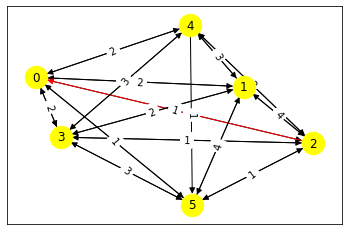

In [277]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pylab

G = nx.read_edgelist('GraphList1.txt', nodetype=str,
  data=(('weight',int),), create_using=nx.DiGraph())

options = {
    'node_color': 'yellow',
    'node_size': 500,
    'width': 1,
    'arrowstyle': '-|>',
    'arrowsize': 12,
    
    "edge_color":edge_colors,
    "edge_cmap":plt.cm.Reds
}



edge_labels=dict([((u,v,),d['weight'])
                 for u,v,d in G.edges(data=True)])

start = 0
end = 2
path = get_path(P, end, start)
dist = dijkstra(V, src, fin)
print("Минимальное расстояние между точками: ", dist)
result_path = [str(item) for item in path]
color_edges = []
for i in range(len(path)-1):
    color_edges.append((result_path[i], result_path[i+1]))

print("Искомый путь: ", color_edges)
edge_colors = ['black' if not edge in color_edges else 'red' for edge in G.edges()]

pos=nx.spring_layout(G)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
nx.draw_networkx(G, pos, arrows=True, **options)

pylab.show()

### Вывод

Были реализованы все задания, а именно: непосредственно сам алгоритм Дейкстры, возможность чтения матрицы смежности из файла, а также графическое отображение графа. Кроме того, было проведено сравнение зависимости времени построения графа от количества узлов.